In [1]:
import kperm as kp

/home/clam/softs/anaconda3/envs/kperm/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:160: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


# Example: MthK with Charge-scaling
In this example, we will compute the permeation cycles and mean first passage time (MFPT) of the associated permeation steps in MthK pore with charges of ions and non-main chain atoms of the SF rescaled by a factor of 0.7. The charge-scaling increases the conductance significantly.

The current directory should contain this Jupyter notebook **kperm.ipynb**, a coordinate file **MthK.pdb** and three directories **traj-0**, **traj-1**, and **traj-2**. Each directory contains a 5-ns trajectory of MthK.

In [2]:
!ls

charge-scaling.ipynb  MthK.pdb	traj-0	traj-1	traj-2


## Create Channel

In [3]:
mthk = kp.Channel()
mthk.coor = "MthK.pdb"
mthk.trajs = [f"traj-{i}/traj-{i}.xtc" for i in range(3)]

## Identify Constituent Atoms of SF
Check if the atoms representing the SF are identified correctly.

In [4]:
sf = kp.detectSF(mthk.coor)

idx	layer	chain	resid	resname	name
728	0	0	63	GLY	O
2031	0	1	63	GLY	O
3334	0	2	63	GLY	O
4637	0	3	63	GLY	O
721	1	0	62	TYR	O
2024	1	1	62	TYR	O
3327	1	2	62	TYR	O
4630	1	3	62	TYR	O
700	2	0	61	GLY	O
2003	2	1	61	GLY	O
3306	2	2	61	GLY	O
4609	2	3	61	GLY	O
693	3	0	60	VAL	O
1996	3	1	60	VAL	O
3299	3	2	60	VAL	O
4602	3	3	60	VAL	O
677	4	0	59	THR	O
1980	4	1	59	THR	O
3283	4	2	59	THR	O
4586	4	3	59	THR	O
670	5	0	59	THR	OG1
1973	5	1	59	THR	OG1
3276	5	2	59	THR	OG1
4579	5	3	59	THR	OG1


/home/clam/softs/anaconda3/envs/kperm/lib/python3.11/site-packages/MDAnalysis/topology/PDBParser.py:328: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


## Compute Ion Occupation States from Trajectories

In [5]:
# with perm_details=True, details including ions and water in SF and permeation events can be found 
# in the directories where trajectories are stored (shared with kperm.log and kperm.csv)
#
# k_in_sf.dat
# (frame number) (atom index) (z-coordinate) (binding site)
#
# kperm_up.dat
# (frame number) (atom index)

mthk.run(perm_details=True, perm_count=['cross', 'jump'])

Reading coordinate MthK.pdb
Reading trajectory traj-0/traj-0.xtc
Finished processing frame 0 / 251 
Total time: 5.000000 ns
dt: 0.020000 ns
Number of K+: 148
Number of water: 7272
Number of net ion permeation events (jump) = 3
Number of net water permeation events (jump) = 0
Current (jump) = 96.11999999999999 pA
Number of upward ion permeation events (cross) = 22
Number of downward ion permeation events (cross) = 18
Number of net ion permeation events (cross) = 4
Number of upward water permeation events (cross) = 0
Number of downward water permeation events (cross) = 0
Number of net water permeation events (cross) = 0
Ion Current (cross) = 128.16 pA
Results saved to /home/clam/projects/Markov/softs/KPerm/tutorials/charge-scaling/traj-0/kperm.csv
Log saved to /home/clam/projects/Markov/softs/KPerm/tutorials/charge-scaling/traj-0/kperm.log
Total execution time: 2.19537 s


Reading coordinate MthK.pdb
Reading trajectory traj-1/traj-1.xtc
Finished processing frame 0 / 251 
Total time: 5.00

## Load Processed Trajectories from kperm.csv and kerm.log and Compute Statistics

In [6]:
mthk.load([f"traj-{i}" for i in range(3)])
mthk.computeStats()

reading results from traj-0/kperm ... permeation counts based on jumps are used.
reading results from traj-1/kperm ... permeation counts based on jumps are used.
reading results from traj-2/kperm ... permeation counts based on jumps are used.
Loading finished.
Current (pA): 149.520	96.120 - 181.560
current (pA): [ 96.12 160.2  192.24]
number of k permeation events: [3, 5, 6]
number of water permeation events: [0, 0, 0]
total time (ns): [5. 5. 5.]
dt (ns): [0.02 0.02 0.02]
coordinate:
	MthK.pdb
trajectories:
	traj-0/traj-0.xtc
	traj-1/traj-1.xtc
	traj-2/traj-2.xtc


## Show Statistics for Each Trajectory
Time, time step, current, and probability of ion occupation states

In [7]:
mthk.stats

,T (ns),dt (ns),current (pA),WKKKKW,WKK0KC,WKK0KW,CKK0KC,CK0KKW,WKKKKC,WKKKWC,...,WKKK0W,CKKKKW,KKK0KC,K0KKKW,KK0KKC,CKKKWC,CK0KKK,KKK0KW,WKK0KK,0KKKKW
0,5.0,0.02,96.12,0.342629,0.095618,0.087649,0.059761,0.091633,0.055777,0.059761,...,0.000000,0.003984,0.003984,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5.0,0.02,160.20,0.199203,0.187251,0.151394,0.047809,0.051793,0.047809,0.023904,...,0.015936,0.003984,0.000000,0.003984,0.003984,0.003984,0.000000,0.000000,0.003984,0.000000
2,5.0,0.02,192.24,0.095618,0.147410,0.151394,0.111554,0.047809,0.063745,0.083665,...,0.019920,0.011952,0.003984,0.003984,0.003984,0.000000,0.003984,0.003984,0.000000,0.003984


## Find Permeation Cycles
Since WKKKKW has the highest probability, so we try to find cycles that start and end in WKKKKW.

In [8]:
mthk.findCycles('WKKKKW')

Trajectory 0
Number of permeation events: 3
Number of identified cycles: 4 	 133.33%

Trajectory 1
Number of permeation events: 5
Number of identified cycles: 5 	 100.00%

Trajectory 2
Number of permeation events: 6
Number of identified cycles: 5 	 83.33%

Total number of permeation events: 14
Total number of identified cycles: 14 	 100.000%




Sometimes the number of identified cycles is larger than the number of permeation events. It is normal as WKKKKW is not necessary the configuration for the first frame. For example, ions may move "backward¨ to form WKKKKW, then move forward to complete a cycle of WKKKKW. Even though a cycle has been complete, there isn't a net flow ion of +1 charge during this cycle due to the previously backward movement of ions.

Let's see all identified cycles.

In [9]:
print("All cycles:\n", mthk.cycles_all)

print("\n\nThe third identified cycle from the first trajectory:\n\n", mthk.cycles_all[0][2])

All cycles:
 [[array(['WKKKKW', 'CK0KKW', 'WK0KKW', 'WKK0KC', 'WKKKKW'], dtype='<U6'), array(['WKKKKW', 'CK0KKW', 'CKK0KW', 'WK0KKW', 'WKK0KW', 'WK0KKC',
       'WKK0KC', 'CKK0KC', 'WKKKKC', 'C0KKKC', 'WKKKKW'], dtype='<U6'), array(['WKKKKW', 'CK0KKW', 'WKK0KC', 'WKK0KW', 'WKKKWW', 'WKKKWC',
       'WKKK0C', 'WKKKKW'], dtype='<U6'), array(['WKKKKW', 'WKKKKC', 'CKK0KC', 'WKK0KC', 'C0KKKW', 'WKKKKW'],
      dtype='<U6')], [array(['WKKKKW', 'C0KKKW', 'CK0KKW', 'CKK0KC', 'CK0KKC', 'WKK0KC',
       'WKKKKW'], dtype='<U6'), array(['WKKKKW', 'WKKKKC', 'C0KKKC', 'CK0KKW', 'CKK0KC', 'WKK0KC',
       'WKKK0C', 'WKKKKW'], dtype='<U6'), array(['WKKKKW', 'CKK0KW', 'WKK0KC', 'WKKKKW'], dtype='<U6'), array(['WKKKKW', 'CK0KKW', 'CKK0KC', 'WKKKKC', 'CK0KKC', 'CKK0KW',
       'WK0KKW', 'WKK0KW', 'WKKKWW', 'WKKKWC', 'WKKK0C', 'WKKKKW'],
      dtype='<U6'), array(['WKKKKW', 'WKKKKC', 'WKK0KC', 'WKKKKW'], dtype='<U6')], [array(['WKKKKW', 'WKK0KW', 'WKK0KC', 'CKK0KC', 'WKKKKW'], dtype='<U6'), array(['WKKKKW

## Plot Permeation Cycles (under development)
Let's try to visualize the cycles

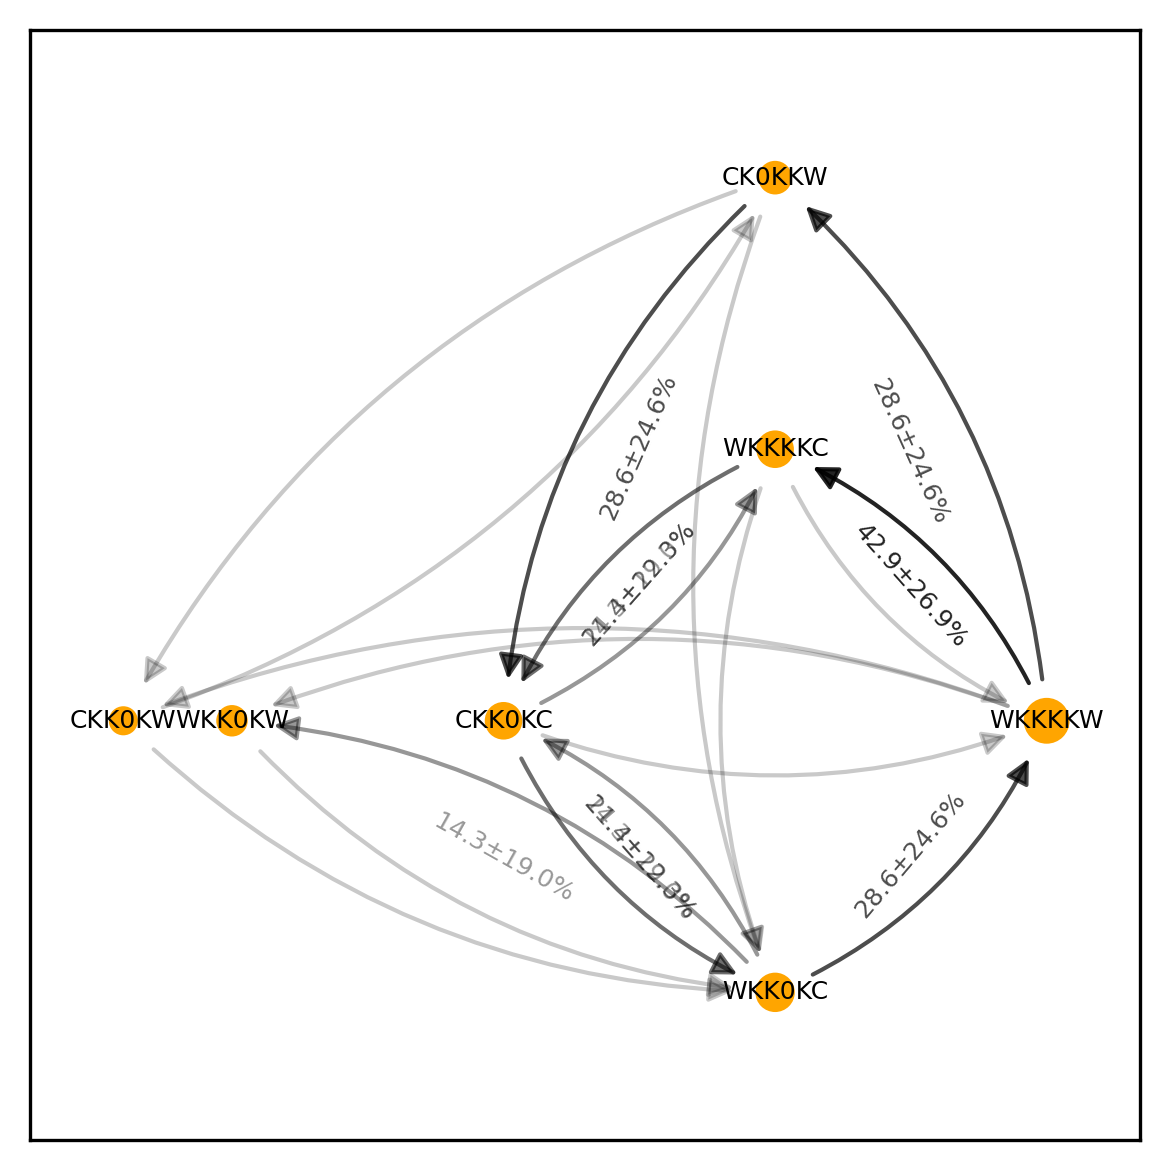

In [10]:
mthk.plotCycles(state_threshold=.05, label_threshold=0.10, offset=1, 
                scale=0.4, figsize=(4,4))

You can plot the cycle yourself using whatever means. The probability of finding a transition from state X to Y in **a reduced permeation cycle** can be found in **Channel.cycleProbs_6**.

In [11]:
print("P(WKKKKW->WKKKKC), 95% error, # observations:\n", mthk.cycleProbs_6['WKKKKW']['WKKKKC'])

P(WKKKKW->WKKKKC), 95% error, # observations:
 (0.42857142857142855, 0.26901529839254634, 6)


The above approach requires a state (WKKKKW) as input. An alternative approach is to check net fluxes (f_ij = p_i * T_ij - p_j * T_ji, where p_i is the staead-state distribution of state i and T_ij is the transition probability from state i to state j) between the SF occupation states.

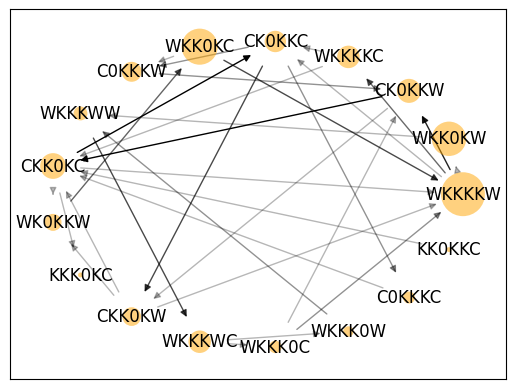

In [12]:
mthk.plotNetFlux(weight_threshold=0.25)

### Compute Mean First Passage Time (MFPT)

Compute the MFPT for the transitions in main permeation cycle shown above. **low** and **high** refer to the 95% bootstrap confidence interval. **n** is the number of observations. **k_f** and **w_f** refer to the average number of forward ion and water jumps in the SF, respectively.

In [13]:
mfpt, _ = mthk.permeationMFPT(paths=[[['WKKKKW'], ['WKKKKC']],
                                     [['WKKKKC'], ['CKK0KC']],
                                     [['CKK0KC'], ['WKK0KC']],
                                     [['WKK0KC'], ['WKKKKW']]
                                    ]
                             )
mfpt

,initial,final,mean (ns),low (ns),high (ns),n,k_f,w_f
0,WKKKKW,WKKKKC,0.145455,0.067273,0.287273,11,0.0,0.0
1,WKKKKC,CKK0KC,0.160000,0.100000,0.236364,11,3.0,0.0
2,CKK0KC,WKK0KC,0.392000,0.182000,0.870000,10,0.0,0.0
3,WKK0KC,WKKKKW,0.389231,0.241538,0.524615,13,2.0,0.0
